# FORESEE Models: Heavy Neutral Leptons (HNLs)

## Load Libraries 

In [1]:
import numpy as np
import sys
import os
src_path = "../../"
sys.path.append(src_path)
from src.foresee import Foresee, Utility, Model
from HeavyNeutralLepton import * 
from matplotlib import pyplot as plt
import matplotlib.colors as mcolors
import random

## 1. Specifying the Model

Heavy Neutral Leptons, denoted by $N$, are right-handed gauge singlets that can be added as an extenstion to the standard model to give mass to the light active neutrinos. These HNLs mix with the SM active neutrinos, and thus pick up couplings to the SM which are suppresed by a small mixing angle, $U_\alpha$. The phenomenology of these interactions can be described by the following Lagrangian: 
\begin{equation} 
\mathcal{L} \supset   - \frac{1}{\sqrt{2}}g\sum_{\alpha=e,\mu,\tau} U^*_\alpha  W_\mu^+  \,\overline{N^c} \, \gamma^\mu l_\alpha  - \frac{1}{2\cos\theta_W}g\sum_{\alpha=e,\mu,\tau} U^*_\alpha Z_\mu  \overline{N^c}\, \gamma^\mu \nu_\alpha+ \text{h.c.} 
\end{equation}


In [2]:
energy = "14"
modelname="HNL"
model = Model(modelname, path="./")
colors=list(mcolors.TABLEAU_COLORS)
length = len(colors)

allchannels = []
production_channels=[]

benchmark_ind = 0
benchmark = ["100","010","001","011","111"]
benchmark_act = benchmark[benchmark_ind]

gen_ind = 1
generators = ["NLO-P8-Min", "NLO-P8", "NLO-P8-Max"]
generators_k = ["SIBYLL","EPOSLHC","QGSJET"]

gen_name=["min","middle","max"]

We initialize the couplings and normalize (relevant for 011 and 111 benchmarks).

In [3]:
vecoup_un = int(benchmark_act[0])
vmucoup_un = int(benchmark_act[1])
vtaucoup_un = int(benchmark_act[2])

mag = np.sqrt(vecoup_un**2 + vmucoup_un**2 + vtaucoup_un**2)
vecoup = vecoup_un  / mag 
vmucoup = vmucoup_un  / mag 
vtaucoup = vtaucoup_un  / mag 

In [4]:
hnl = HeavyNeutralLepton(ve=vecoup, vmu=vmucoup, vtau=vtaucoup)

We initialize the MC steps

In [5]:
nsteps=10
masses = [round(x,5) for x in np.logspace(-1,1,10+1)]

**Production:** The semileptonic two body decay of a pseudoscalar meson $P \to P' N$ is a dominant production mechanism for HNL's. Elements in `channels` have the form `[decay label, parent particle pid (with sign), sign of produced lepton PID (- for positron + for electron),generator]`.

In [6]:
channels = [
    [r'D^+ \to l^+ + N'    , '411', '-',generators[gen_ind]],
    [r'D^- \to l^- + N'    ,'-411', '' ,generators[gen_ind]],
    [r'D_s^+ \to l^+ + N'  , '431', '-',generators[gen_ind]],
    [r'D_s^- \to l^- + N'  ,'-431', '' ,generators[gen_ind]],
    [r'B^+ \to + l^+ + N'  , '521', '-',generators[gen_ind]],
    [r'B^- \to + l^- + N'  ,'-521', '' ,generators[gen_ind]],
    [r'B_c^+ \to + l^+ + N', '541', '-',generators[gen_ind]],
    [r'B_c^- \to + l^- + N','-541', '' ,generators[gen_ind]],
    [r'pi^+ \to + l^+ + N','211', '-' ,"EPOSLHC"],
    [r'pi^- \to + l^- + N','-211', '' ,"EPOSLHC"],
    [r'K^+ \to + l^+ + N','321', '-' ,generators_k[gen_ind]],
    [r'K^- \to + l^- + N','-321', '' ,generators_k[gen_ind]]
]


for label, pid_had, sign_lep, generator in channels:
    for pid_lep in ["11","13","15"]:
        if hnl.vcoupling[pid_lep] <1e-9: continue
        label1 = "2body_" + pid_had + "_" + sign_lep+pid_lep
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        print(label1)
        #print(label2)
        model.add_production_2bodydecay(
            label = label1,
            pid0 = pid_had,
            pid1 = pid_lep,
            br = hnl.get_2body_br(pid_had, sign_lep+pid_lep),
            generator = generator,
            energy = energy,
            nsample = nsteps,
        )
        allchannels.append(label1)

2body_411_-11
2body_-411_11
2body_431_-11
2body_-431_11
2body_521_-11
2body_-521_11
2body_541_-11
2body_-541_11
2body_211_-11
2body_-211_11
2body_321_-11
2body_-321_11


They can also be produced in the two body decay of the $\tau$ lepton, $\tau \to \pi N$. Elements in `channels` have the form `[decay label, parent particle pid, produced hadron pid (without sign), sign of produced hadron, generator]`.


In [7]:
'''channels = [
[r'\tau^- \to \pi^- + N','15','211', '-' , "Pythia8"],
[r'\tau^+ \to \pi^+ + N','-15','211', ''  , "Pythia8"],
[r'\tau^- \to K^- + N'  ,'15','321', '-' , "Pythia8"],
[r'\tau^+ \to K^+ + N'  ,'-15','321', ''  , "Pythia8"],
[r'\tau^- \to \rho^- + N','15','213', '-', "Pythia8"],
[r'\tau^+ \to \rho^+ + N','-15','213', '' , "Pythia8"],
[r'\tau^- \to K^{*-} + N','15','213', '-' , "Pythia8"],
[r'\tau^+ \to K^{*+} + N','-15','213', '' , "Pythia8"]
]


for label, pid_tau, pid_had, sign_had, generator in channels:
    if hnl.vcoupling[str(abs(int(pid_tau)))] <1e-9: continue
    label1 = "2body_tau_" + pid_tau + "_" + sign_had+pid_had
    label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
    production_channels.append(label2)
    #print(label2)
    model.add_production_2bodydecay(
        label = label1,
        pid0 = pid_tau,
        pid1 = pid_had,
        br = hnl.get_2body_br_tau(pid_tau, sign_had+pid_had),
        generator = generator,
        energy = energy,
        nsample = nsteps,
    )
    allchannels.append(label1)'''

'channels = [\n[r\'\tau^- \to \\pi^- + N\',\'15\',\'211\', \'-\' , "Pythia8"],\n[r\'\tau^+ \to \\pi^+ + N\',\'-15\',\'211\', \'\'  , "Pythia8"],\n[r\'\tau^- \to K^- + N\'  ,\'15\',\'321\', \'-\' , "Pythia8"],\n[r\'\tau^+ \to K^+ + N\'  ,\'-15\',\'321\', \'\'  , "Pythia8"],\n[r\'\tau^- \to \rho^- + N\',\'15\',\'213\', \'-\', "Pythia8"],\n[r\'\tau^+ \to \rho^+ + N\',\'-15\',\'213\', \'\' , "Pythia8"],\n[r\'\tau^- \to K^{*-} + N\',\'15\',\'213\', \'-\' , "Pythia8"],\n[r\'\tau^+ \to K^{*+} + N\',\'-15\',\'213\', \'\' , "Pythia8"]\n]\n\n\nfor label, pid_tau, pid_had, sign_had, generator in channels:\n    if hnl.vcoupling[str(abs(int(pid_tau)))] <1e-9: continue\n    label1 = "2body_tau_" + pid_tau + "_" + sign_had+pid_had\n    label2=\'[\' + \'"\' + label1 + \'"\' + \', \' + \'"\' + colors[random.randint(0,length-1)] + \'"\' + \', \' + \'r"$\' + label + \'$"\' + \'],\'\n    production_channels.append(label2)\n    #print(label2)\n    model.add_production_2bodydecay(\n        label = label1,\n

We can also produce them through the three body decay of a pseudoscalar meson $P$ to a pseudoscalar $P'$, a lepton $\ell$ and $N$, through the process $P \to P' \ell N$. Elements of `channels` have the form `[decay label, pid of parent hadron, pid of daughter meson (with sign), sign of produced lepton's pid]`.


In [8]:
'''channels = [
    [r'D^0 \to K^- + l^+ + N'             , '421' , '-321' , '-', generators[gen_ind]],
    [r'D^0 \to K^+ + l^- + N'             , '-421', '321'  , '' , generators[gen_ind]],
    [r'D^+ \to \bar{K}^0 + l^+ + N'       , '411' , '-311' , '-', generators[gen_ind]],
    [r'D^- \to K^0 + l^- + N'             ,'-411' , '311'  , '' , generators[gen_ind]],
    [r'B^+ \to \bar{D}^0 + l^+ + N'       , '521' ,  '-421', '-', generators[gen_ind]],
    [r'B^- \to D^0 + l^- + N'             , '-521',  '421' , '' , generators[gen_ind]],
    [r'B^0 \to D^- + l^+ + N'             , '511' , '-411' , '-', generators[gen_ind]],
    [r'B^0 \to D^+ + l^- + N'             , '-511', '411'  , '' , generators[gen_ind]],
    [r'B^0_s \to D^-_s + l^+ + N'         , '531' , '-431' , '-', generators[gen_ind]],
    [r'B^0_s \to D^+_s + l^- + N'         , '-531', '431'  , '' , generators[gen_ind]],
    [r'B^+_c \to B^0 + l^+ + N'           , '541' ,  '511' , '-', generators[gen_ind]],
    [r'B^-_c \to \bar{B}^0 + l^- + N'     , '-541',  '-511', '' , generators[gen_ind]],
    [r'B^+_c \to B^0_s + l^+ + N'         , '541' ,  '531' , '-', generators[gen_ind]],
    [r'B^-_c \to \bar{B}^0_s + l^- + N'   , '-541',  '-531', '' , generators[gen_ind]],
    #new modes
    [r'K^0_S \to \pi^+ + l^- + N'         , '310' , '211'  , '' ,generators_k[gen_ind]], 
    [r'K^0_S \to \pi^- + l^+ + N'         , '310' , '-211' , '-', generators_k[gen_ind]],
    [r'K^0_L \to \pi^+ + l^- + N'         , '130' , '211'  , '' , generators_k[gen_ind]],
    [r'K^0_L \to \pi^- + l^+ + N'         , '130' , '-211' , '-', generators_k[gen_ind]],
    [r'K^+ \to \pi^0 + l^+ + N'           , '321' , '111'  , '-', generators_k[gen_ind]], 
    [r'K^- \to \pi^0 + l^- + N'           , '-321', '111'  , '' , generators_k[gen_ind]], 
    [r'D_s^+ \to \eta + l^+ + N'          , '431' , '221'  , '-', generators[gen_ind]],
    [r'D_s^- \to \eta + l^- + N'          , '-431', '221'  , '' , generators[gen_ind]],
    [r'D_s^+ \to \eta\' + l^+ + N'        , '431' , '331'  , '-', generators[gen_ind]],
    [r'D_s^- \to \eta\' + l^- + N'        , '-431', '331'  , '' , generators[gen_ind]],
    [r'B^+ \to \pi^0 + l^+ + N'           , '521' , '111'  , '-', generators[gen_ind]],
    [r'B^- \to \pi^0 + l^- + N'           , '-521', '111'  , '' , generators[gen_ind]],
    [r'B^+_c \to D^0 + l^+ + N'           , '541' , '421'  , '-', generators[gen_ind]],
    [r'B^-_c \to \bar{D^0} + l^- + N'     , '-541', '-421' , '' , generators[gen_ind]],
    [r'B^+_c \to \eta_c + l^+ + N'        , '541' , '441'  , '-', generators[gen_ind]],
    [r'B^-_c \to \eta_c + l^- + N'        , '-541', '441'  , '' , generators[gen_ind]],
    [r'D^0 \to \pi^- + l^+ + N'           , '421' , '-211' , '-', generators[gen_ind]],
    [r'\bar{D^0} \to \pi^+ + l^- + N'     , '-421', '211'  , '' , generators[gen_ind]],
    [r'D^+ \to \pi^0 + l^+ + N'           , '411' , '111'  , '-', generators[gen_ind]],
    [r'D^- \to \pi^0 + l^- + N'           , '-411', '111'  , '' , generators[gen_ind]],
    [r'D_s^+ \to K^0 + l^+ + N'           , '431' , '311'  , '-', generators[gen_ind]],
    [r'D_s^- \to \bar{K^0} + l^- + N'     , '-431', '-311' , '' , generators[gen_ind]],
    [r'B^0 \to \pi^- + l^+ + N'           , '511' , '-211' , '-', generators[gen_ind]],
    [r'\bar{B^0} \to \pi^+ + l^- + N'     , '-511', '211'  , '' , generators[gen_ind]],
    [r'B^0_s \to K^- + l^+ + N'           , '531' , '-321' , '-', generators[gen_ind]],
    [r'\bar{B^0_s} \to K^+ + l^- + N'     , '-531', '321'  , '' , generators[gen_ind]],
    [r'D^+ \to \eta + l^+ + N'            , '411' , '221'  , '-', generators[gen_ind]],
    [r'D^- \to \eta + l^- + N'            , '-411' , '221'  , '', generators[gen_ind]],
    [r'D^+ \to \eta\' + l^+ + N'          , '411' , '331'  , '-', generators[gen_ind]],
    [r'D^- \to \eta\' + l^- + N'          , '-411' , '331'  , '', generators[gen_ind]],
    [r'B^+ \to \eta + l^+ + N'            , '521' , '221'  , '-' , generators[gen_ind]],
    [r'B^- \to \eta + l^- + N'            , '-521' , '221'  , '' , generators[gen_ind]],
    [r'B^+ \to \eta\' + l^+ + N'          , '521' , '331'  , '-' , generators[gen_ind]],
    [r'B^- \to \eta\' + l^- + N'          , '-521' , '331'  , '' , generators[gen_ind]]
]


#print(len(channels))
for label, pid_parent, pid_daughter, sign_lep, generator in channels:
    if model.masses(pid_parent) >= model.masses('15') + model.masses(pid_daughter):
        leptons=["11","13","15"]
    if model.masses(pid_parent) <= model.masses('15') + model.masses(pid_daughter):
        leptons=["11","13"]
    for pid_lep in leptons:
        if hnl.vcoupling[pid_lep] <1e-9: continue
        label1="3body_pseudo_" + pid_parent + "_" +pid_daughter+ "_" + sign_lep+pid_lep
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        #print(label2)
        model.add_production_3bodydecay(
            label = label1,
            pid0 = pid_parent,
            pid1 = pid_daughter,
            pid2 = sign_lep+pid_lep,
            br = hnl.get_3body_dbr_pseudoscalar(pid_parent,pid_daughter,sign_lep+pid_lep),
            generator = generator,
            energy = energy,
            nsample = nsteps,
            integration = "dq2dE",
        )
        allchannels.append(label1)'''

'channels = [\n    [r\'D^0 \to K^- + l^+ + N\'             , \'421\' , \'-321\' , \'-\', generators[gen_ind]],\n    [r\'D^0 \to K^+ + l^- + N\'             , \'-421\', \'321\'  , \'\' , generators[gen_ind]],\n    [r\'D^+ \to \x08ar{K}^0 + l^+ + N\'       , \'411\' , \'-311\' , \'-\', generators[gen_ind]],\n    [r\'D^- \to K^0 + l^- + N\'             ,\'-411\' , \'311\'  , \'\' , generators[gen_ind]],\n    [r\'B^+ \to \x08ar{D}^0 + l^+ + N\'       , \'521\' ,  \'-421\', \'-\', generators[gen_ind]],\n    [r\'B^- \to D^0 + l^- + N\'             , \'-521\',  \'421\' , \'\' , generators[gen_ind]],\n    [r\'B^0 \to D^- + l^+ + N\'             , \'511\' , \'-411\' , \'-\', generators[gen_ind]],\n    [r\'B^0 \to D^+ + l^- + N\'             , \'-511\', \'411\'  , \'\' , generators[gen_ind]],\n    [r\'B^0_s \to D^-_s + l^+ + N\'         , \'531\' , \'-431\' , \'-\', generators[gen_ind]],\n    [r\'B^0_s \to D^+_s + l^- + N\'         , \'-531\', \'431\'  , \'\' , generators[gen_ind]],\n    [r\'B^+

It can also be produced in a three body decay of a pseudoscalar meson to a vector meson through the channel $P \to V \ell N$. Elements of `channels` have the form `[decay label, parent pid, daughter pid, sign of produced lepton - (pid) is a positive lepton]`.

In [9]:
'''channels = [
    [r'D^0 \to K^{*-} + l^+ + N'                  ,'421' ,'-323', '-' , generators[gen_ind]],
    [r'D^0 \to K^{*+} + l^- + N'                  ,'-421', '323', ''  , generators[gen_ind]],
    [r'B^+ \to \bar{D}^*0 + l^+ + N'              ,'521' ,'-423', '-' , generators[gen_ind]],
    [r'B^- \to D^*0 + l^- + N'                    ,'-521','423' , ''  , generators[gen_ind]],
    [r'B^0 \to D^{*-} + l^+ + N'                  ,'511' ,'-413', '-' , generators[gen_ind]],
    [r'B^0 \to D^{*+} + l^- + N'                  ,'-511','413' , ''  , generators[gen_ind]],
    [r'B^0_s \to D^{*-}_s + l^+ + N'              ,'531' ,'-433', '-' , generators[gen_ind]],
    [r'B^0_s \to D^{*+}_s + l^- + N'              ,'-531','433' , ''  , generators[gen_ind]],
    [r'B^+_c \to B^{*0} + l^+ + N'                ,'541' ,'513' , '-' , generators[gen_ind]],
    [r'B^-_c \to \bar{B}^{*0} + l^- + N'          ,'-541','-513', ''  , generators[gen_ind]],
    [r'B^+_c \to B^{*0}_s+ l^+ + N'               ,'541' ,'533' , '-' , generators[gen_ind]],
    [r'B^-_c \to \bar{B}^{*0}_s+ l^- + N'         ,'-541','-533', ''  , generators[gen_ind]],
    #new modes
    [r'B^+ \to \rho^0 + l^+ + N'                  , '521', '113', '-' , generators[gen_ind]],
    [r'B^- \to \rho^0 + l^- + N'                  ,'-521', '113', ''  , generators[gen_ind]],
    [r'B^+_c \to J/\psi + l^+ + N'                , '541', '443', '-' , generators[gen_ind]],
    [r'B^-_c \to J/\psi + l^- + N'                ,'-541', '443', ''  , generators[gen_ind]],
    [r'D^0 \to \rho^- + l^+ + N'                  , '421','-213', '-' , generators[gen_ind]],
    [r'\bar{D^0} \to \rho^+ + l^- + N'            ,'-421', '213', ''  , generators[gen_ind]],
    [r'D^+ \to \rho^0 + l^+ + N'                  , '411', '113', '-' , generators[gen_ind]],
    [r'D^- \to \rho^0 + l^- + N'                  ,'-411', '113', ''  , generators[gen_ind]],
    [r'D^- \to K^{*0} + l^- + N'                  ,'-411', '313', ''  , generators[gen_ind]],
    [r'D^+ \to \bar{K^{*0}} + l^+ + N'            ,'-411', '-313', '-', generators[gen_ind]],
    [r'D^+_s \to K^{*0} + l^+ + N'                , '431', '313', '-' , generators[gen_ind]],
    [r'D^-_s \to \bar{K^{*0}} + l^- + N'          ,'-431','-313', '-' , generators[gen_ind]],
    [r'D^+_s \to \phi + l^+ + N'                  , '431', '333', '-' , generators[gen_ind]],
    [r'D^-_s \to \phi + l^- + N'                  ,'-431', '333', ''  , generators[gen_ind]],
    [r'B^0 \to \rho^- + l^+ + N'                  , '511','-213', '-' , generators[gen_ind]],
    [r'\bar{B^0} \to \rho^+ + l^- + N'            ,'-511', '213', ''  , generators[gen_ind]],
    [r'B^0_s \to K^{*-} + l^+ + N'                , '531','-323', '-' , generators[gen_ind]],
    [r'\bar{B^0_s} \to K^{*+} + l^- + N'          ,'-531', '323', ''  , generators[gen_ind]],
    [r'B^+_c \to D^{*0} + l^+ + N'                , '541', '423', '-' , generators[gen_ind]],
    [r'B^-_c \to \bar{D^{*0}} + l^- + N'          ,'-541','-423', ''  , generators[gen_ind]],
    [r'D^- \to \omega + l^- + N'                  ,'-411', '223', ''  , generators[gen_ind]],
    [r'D^+ \to \omega + l^+ + N'                  , '411', '223', '-' , generators[gen_ind]],
    [r'B^- \to \omega + l^- + N'                  ,'-521', '223', ''  , generators[gen_ind]],
    [r'B^+ \to \omega + l^+ + N'                  , '521', '223', '-' , generators[gen_ind]],
]

for label, pid_parent, pid_daughter, sign_lep, generator in channels:
    if model.masses(pid_parent) >= model.masses('15') + model.masses(pid_daughter):
        leptons=["11","13","15"]
    if model.masses(pid_parent) <= model.masses('15') + model.masses(pid_daughter):
        leptons=["11","13"]
    for pid_lep in ["11","13","15"]:
        if hnl.vcoupling[pid_lep] <1e-9: continue
        label1="3body_vector_" + pid_parent + "_" +pid_daughter+ "_" + sign_lep+pid_lep
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        #print(label2)
        model.add_production_3bodydecay(
            label = label1,
            pid0 = pid_parent,
            pid1 = pid_daughter,
            pid2 = sign_lep+pid_lep,
            br = hnl.get_3body_dbr_vector(pid_parent,pid_daughter,sign_lep+pid_lep),
            generator = generator,
            energy = energy,
            nsample = nsteps,
            integration = "dq2dE",
        )
        allchannels.append(label1)'''

'channels = [\n    [r\'D^0 \to K^{*-} + l^+ + N\'                  ,\'421\' ,\'-323\', \'-\' , generators[gen_ind]],\n    [r\'D^0 \to K^{*+} + l^- + N\'                  ,\'-421\', \'323\', \'\'  , generators[gen_ind]],\n    [r\'B^+ \to \x08ar{D}^*0 + l^+ + N\'              ,\'521\' ,\'-423\', \'-\' , generators[gen_ind]],\n    [r\'B^- \to D^*0 + l^- + N\'                    ,\'-521\',\'423\' , \'\'  , generators[gen_ind]],\n    [r\'B^0 \to D^{*-} + l^+ + N\'                  ,\'511\' ,\'-413\', \'-\' , generators[gen_ind]],\n    [r\'B^0 \to D^{*+} + l^- + N\'                  ,\'-511\',\'413\' , \'\'  , generators[gen_ind]],\n    [r\'B^0_s \to D^{*-}_s + l^+ + N\'              ,\'531\' ,\'-433\', \'-\' , generators[gen_ind]],\n    [r\'B^0_s \to D^{*+}_s + l^- + N\'              ,\'-531\',\'433\' , \'\'  , generators[gen_ind]],\n    [r\'B^+_c \to B^{*0} + l^+ + N\'                ,\'541\' ,\'513\' , \'-\' , generators[gen_ind]],\n    [r\'B^-_c \to \x08ar{B}^{*0} + l^- + N\'          ,\

Lastly, HNL's can be produced through two types of $\tau$ lepton three body decays: $\tau \to \nu_{\tau} l N$ and $\tau \to \bar{\nu}_l l N$

In [10]:
'''channels = [
[r'\tau^- \to l^- + \nu_{\tau} + N','15','16','',"Pythia8"],
[r'\tau^+ \to l^+ + \nu_{\tau} + N','-15','-16','-',"Pythia8"]
]


for label, pid_parent, pid_nu, sign_lep, generator in channels:
    for pid_lep in ["11","13"]:
        if hnl.vcoupling[pid_lep] <1e-9: continue
        label1="3body_tau_" + pid_parent + "_" + sign_lep+pid_lep + "_" + pid_nu
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        model.add_production_3bodydecay(
            label = label1,
            pid0 = pid_parent,
            pid1 = sign_lep+pid_lep,
            pid2 = pid_nu,
            br = hnl.get_3body_dbr_tau(pid_parent,sign_lep+pid_lep,pid_nu),
            generator = generator,
            energy = energy,
            nsample = nsteps,
            integration = "dE",
        )
        allchannels.append(label1)


channels=[
[r'\tau^- \to l^- + \bar{\nu}_l + N','15','',"Pythia8"],
[r'\tau^+ \to l^+ + \bar{\nu}_l + N','-15','-',"Pythia8"]
]

pid_tau="15"
for label, pid_parent, sign_lep, generator in channels:
    for pid_lep in ["11","13"]:
        if pid_lep=="11":
            label=r'\tau^- \to e^- + \bar{\nu}_e + N'
            pid_nu="12"
        if pid_lep=="13":
            label=r'\tau^- \to \mu^- + \bar{\nu}_{\mu} + N'
            pid_nu="14"
        if sign_lep + pid_lep=="-11":
            pid_nu="-12"
        if sign_lep + pid_lep=="-13":
            pid_nu="-14"
        if hnl.vcoupling[pid_tau] <1e-9: continue
        label1="3body_tau_" + pid_parent + "_" + sign_lep+pid_lep + "_" + pid_nu
        label2='[' + '"' + label1 + '"' + ', ' + '"' + colors[random.randint(0,length-1)] + '"' + ', ' + 'r"$' + label + '$"' + '],'
        production_channels.append(label2)
        model.add_production_3bodydecay(
            label = label1,
            pid0 = pid_parent,
            pid1 = sign_lep+pid_lep,
            pid2 = pid_nu,
            br = hnl.get_3body_dbr_tau(pid_parent,sign_lep+pid_lep,pid_nu),
            generator = generator,
            energy = energy,
            nsample = nsteps,
            integration = "dE",
        )
        allchannels.append(label1)'''

'channels = [\n[r\'\tau^- \to l^- + \nu_{\tau} + N\',\'15\',\'16\',\'\',"Pythia8"],\n[r\'\tau^+ \to l^+ + \nu_{\tau} + N\',\'-15\',\'-16\',\'-\',"Pythia8"]\n]\n\n\nfor label, pid_parent, pid_nu, sign_lep, generator in channels:\n    for pid_lep in ["11","13"]:\n        if hnl.vcoupling[pid_lep] <1e-9: continue\n        label1="3body_tau_" + pid_parent + "_" + sign_lep+pid_lep + "_" + pid_nu\n        label2=\'[\' + \'"\' + label1 + \'"\' + \', \' + \'"\' + colors[random.randint(0,length-1)] + \'"\' + \', \' + \'r"$\' + label + \'$"\' + \'],\'\n        production_channels.append(label2)\n        model.add_production_3bodydecay(\n            label = label1,\n            pid0 = pid_parent,\n            pid1 = sign_lep+pid_lep,\n            pid2 = pid_nu,\n            br = hnl.get_3body_dbr_tau(pid_parent,sign_lep+pid_lep,pid_nu),\n            generator = generator,\n            energy = energy,\n            nsample = nsteps,\n            integration = "dE",\n        )\n        allchannels.

**Decay:** HNLs can decay into purely leptonic finalstates, $\nu\, l_\alpha^+ l_\beta^-$ or $\nu\nu\nu$, and Hadronic finalstates, $\nu H^0 (q\overline{q})$ or $l^\pm H^\mp (q\overline{q}')$,   with a decay width proportional to $\epsilon^2$. Since we are considering Majorana HNLs, LNV decays are included. We implemented the decay formulas given in [1905.00284](https://arxiv.org/abs/1905.00284). The function `hnl.get_br_and_ctau()` is used to generate the decay branching fractions and lifetimes and stores them in the `Decay Data` folder. 

In [11]:
hnl.get_br_and_ctau(mpts=masses)

model.set_ctau_1d(
    filename=f"Decay Data/{tuple(hnl.vcoupling.values())}/ctau.txt",
    coupling_ref=1 
)

modes,finalstates,filenames = hnl.set_brs()

model.set_br_1d(
    modes=modes,
    finalstates=finalstates,
    filenames=filenames
)

model.br_finalstate

/Users/alechewitt/Desktop/Git_felix/FORESEE/Models/HNL/HNL_Decay.py:115: RuntimeWarning: invalid value encountered in sqrt
  integrand = lambda s: (1/s)*(1 + x - s)*np.sqrt(Lambda(s,y,z))*np.sqrt(Lambda(1,s,x))
/Users/alechewitt/Desktop/Git_felix/FORESEE/Models/HNL/HNL_Decay.py:117: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  integral,error = integrate.quad(integrand, (np.sqrt(y) + np.sqrt(z))**2, (1 - np.sqrt(x))**2)
/Users/alechewitt/Desktop/Git_felix/FORESEE/Models/HNL/HNL_Decay.py:105: RuntimeWarning: invalid value encountered in sqrt
  integrand = lambda s: (1/s)*(s - x - y)*(1 + z - s)*np.sqrt(Lambda(s,x,y))*np.sqrt(Lambda(1,s,z))
/Users/alechewitt/Desktop/Git_felix/FORESEE/Models/HNL/HNL_Decay.py:107: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underest

{('nu', 'e', 'anti_e'): ['20', '11', '-11'],
 ('nu', 'mu', 'anti_mu'): ['20', '13', '-13'],
 ('nu', 'tau', 'anti_tau'): ['20', '15', '-15'],
 ('e', 'anti_mu', 'nu'): ['11', '-13', '20'],
 ('mu', 'anti_e', 'nu'): ['13', '-11', '20'],
 ('e', 'anti_tau', 'nu'): ['11', '-15', '20'],
 ('tau', 'anti_e', 'nu'): ['15', '-11', '20'],
 ('nu', 'nu', 'nu'): ['20', '20', '20'],
 ('nu', 'pi0'): ['20', '111'],
 ('nu', 'eta'): ['20', '221'],
 ('e', 'pi+'): ['11', '211'],
 ('anti_e', 'anti_pi+'): ['-11', '-211'],
 ('e', 'K+'): ['11', '321'],
 ('anti_e', 'anti_K+'): ['-11', '-321'],
 ('nu', 'rho0'): ['20', '113'],
 ('nu', 'omega'): ['20', '223'],
 ('e', 'rho+'): ['11', '213'],
 ('anti_e', 'anti_rho+'): ['-11', '-213'],
 ('e', 'K+*'): ['11', '323'],
 ('anti_e', 'anti_K+*'): ['-11', '-323'],
 ('e', 'u', 'anti_d'): ['11', '2', '-1'],
 ('anti_e', 'anti_u', 'd'): ['-11', '-2', '1'],
 ('e', 'u', 'anti_s'): ['11', '2', '-3'],
 ('anti_e', 'anti_u', 's'): ['-11', '-2', '3'],
 ('e', 'u', 'anti_b'): ['11', '2', '-

We can now initiate FORESEE with the model that we just created. 

In [12]:
foresee = Foresee()
foresee.set_model(model=model)

We can see what the branching fractions look like for each of the production channels.

/Users/alechewitt/Desktop/Git_felix/FORESEE/Models/HNL/../../src/foresee.py:1563: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xlims[0],xlims[1])
/Users/alechewitt/Desktop/Git_felix/FORESEE/Models/HNL/../../src/foresee.py:1564: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_ylim(ylims[0],ylims[1])


<module 'matplotlib.pyplot' from '/opt/miniconda3/envs/forsee/lib/python3.10/site-packages/matplotlib/pyplot.py'>

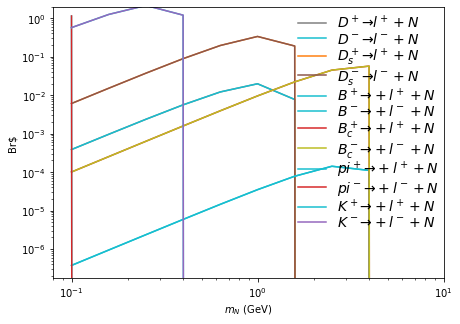

In [13]:
production_channels_fin=[]
for n in range(len(production_channels)):
    production_channels_fin.append(eval(production_channels[n])[0])
foresee.plot_production_branchings(
        masses = masses, 
        productions = production_channels_fin,
        xlims=[0,10],ylims=[0,2],
        xlabel=r"$m_N$ (GeV)", 
        ylabel=r"Br$",
        figsize=(7,5), fs_label=14, title=None, legendloc=(1.02,1.02), dolegend=True, ncol=1, xlog=True, ylog=True,
        nsample=nsteps)

## 2. Event Generation

In the following, we want to study one specific benchmark point with $m_{N}=1$ GeV and $\epsilon=3\cdot 10^{-5}$ and export events as a HEPMC file. 

In [14]:
mass, coupling, = 1.0, 1e-3

First, we will produce the corresponding flux for this mass and a reference coupling $\epsilon_{ref}=1$. 

save data to file: ./model/LLP_spectra/14TeV_2body_411_-11_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-411_11_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/14TeV_2body_431_-11_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-431_11_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/14TeV_2body_521_-11_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-521_11_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/14TeV_2body_541_-11_NLO-P8_m_1.0.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-541_11_NLO-P8_m_1.0.npy


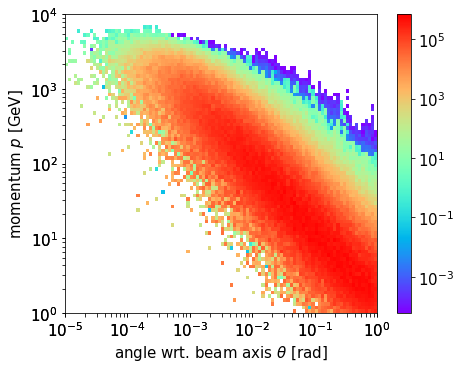

In [15]:
plot=foresee.get_llp_spectrum(mass=mass, coupling=1.0, do_plot=True, save_file=True)
plot.show()

Next, let us define the configuration of the detector (in terms of position, size and luminosity). Here we choose FASER during LHC Run 3. 

In [16]:
foresee.set_detector(
    distance=480, 
    selection="np.sqrt(x.x**2 + x.y**2)<.1", 
    length=1.5, 
    luminosity=250, 
)

For our benchmark point, let us now look at how many particle decay inside the decay volume. We also export 1000 unweighted events as a HEPMC file. 

In [17]:
setupnames = [r'D to l N']
mode = str(next(iter(model.production)))
generator = model.production[mode]['production']
modes = {mode: generator}

_, _, _, weighted_raw_data, weights = foresee.get_events(mass=mass, energy=energy, couplings = [coupling], nsample=nsteps, modes=modes)

momenta, weights, _ = foresee.write_events(
    mass = mass, 
    coupling = coupling, 
    energy = energy, 
    numberevent = 1000,
    filename = "model/events/test.hepmc", 
    return_data = True,
    weightnames=setupnames,
    modes=modes,
)

for isetup, setup in enumerate(setupnames):
    print("Expected number of events for "+setup+":", round(sum(weights[:,isetup]),3))

Expected number of events for D to l N: 0.027


Let us plot the resulting energy distribution

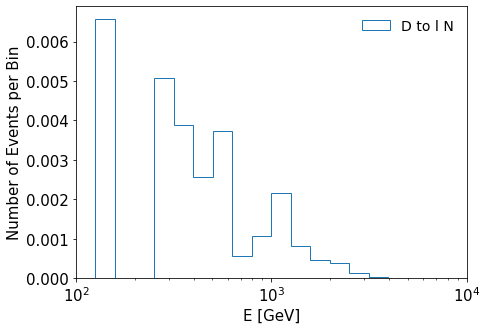

In [18]:
fig = plt.figure(figsize=(7,5))
ax = plt.subplot(1,1,1)
energies = [p.e for p in momenta], 
for isetup, setup in enumerate(setupnames):
    ax.hist(energies, weights=weights[:,isetup], bins=np.logspace(2,4, 20+1), histtype='step', label=setup) 
ax.set_xscale("log")
ax.set_xlim(1e2,1e4) 
ax.set_xlabel("E [GeV]") 
ax.set_ylabel("Number of Events per Bin") 
ax.legend(frameon=False, labelspacing=0, fontsize=14, loc='upper right')
plt.show()

## 3. Sensitivity Reach

In the following, we will obtain the projected sensitivity for the LLP model. For this, we first define a grid of couplings and masses, and then produce the corresponding fluxes. 

In [19]:
couplings = np.logspace(-5,0,50+1)
for mass in masses: foresee.get_llp_spectrum(mass=mass,coupling=1)

save data to file: ./model/LLP_spectra/14TeV_2body_411_-11_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-411_11_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_431_-11_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-431_11_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_521_-11_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-521_11_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_541_-11_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-541_11_NLO-P8_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_211_-11_EPOSLHC_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-211_11_EPOSLHC_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_321_-11_EPOSLHC_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_-321_11_EPOSLHC_m_0.1.npy
save data to file: ./model/LLP_spectra/14TeV_2body_411_-11_NLO-P8_m_0.15849.npy
save

We can now plot the `production rate vs mass` using the `foresee.plot_production()` function.

<module 'matplotlib.pyplot' from '/opt/miniconda3/envs/forsee/lib/python3.10/site-packages/matplotlib/pyplot.py'>

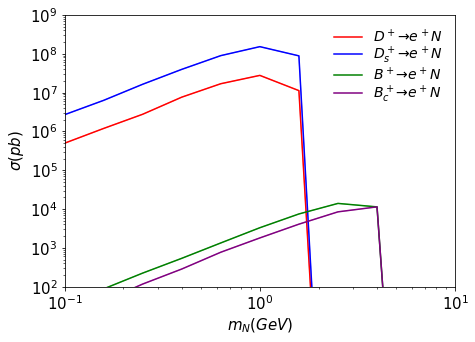

In [20]:
productions = [
    {"channels": ["2body_411_-11"] , "color": "red"    , "label": r"$D^+ \to e^+ N$"  , "generators": [generators[gen_ind]]  },
    {"channels": ["2body_431_-11"] , "color": "blue"   , "label": r"$D_s^+ \to e^+ N$", "generators": [generators[gen_ind]]  },
    {"channels": ["2body_521_-11"] , "color": "green"  , "label": r"$B^+ \to e^+ N$"  , "generators": [generators[gen_ind]]  },
    {"channels": ["2body_541_-11"] , "color": "purple" , "label": r"$B_c^+ \to e^+ N$", "generators": [generators[gen_ind]]  },
    ]

foresee.plot_production(
        masses=masses, 
        productions = productions, 
        condition="True", 
        energy=energy,
        xlims=[0.1,10],
        ylims=[1e2,1e9],
        xlabel=r"$m_N (GeV)$", 
        ylabel=r"$\sigma (pb)$",
        figsize=(7,5), 
        fs_label=14, 
        title=None, 
        legendloc=None, 
        dolegend=True, 
        ncol=1,
    )

Let us now scan over various masses and couplings, and record the resulting number of events. Here we are iterating over various detector configurations: FASER Run 3, FASER HL-LHC, and FASER2 HL-LHC. 

In [21]:
visible_modes = [mode for mode in list(model.br_finalstate.keys()) if mode != ('nu', 'nu', 'nu')]

detectors = [
    ["RUN3_FASER", 480, "np.sqrt(x.x**2 + x.y**2)< .1", 1.5, 250 ,  visible_modes],
    [f"HL_FASER", 480 , "np.sqrt(x.x**2 + x.y**2)< .1", 1.5, 3000,  visible_modes],
    [f"HL_FASER2", 620, "-1.5<x.x<1.5 and -.5<x.y<.5" , 10 , 3000,  visible_modes],
]

for detector in detectors: 
    
    label, distance, selection, length, luminosity, channels  = detector
    foresee.set_detector(distance=distance, selection=selection, length=length, luminosity=luminosity, channels=channels)

    list_nevents = []
    for mass in masses:
        couplings, _, nevents, _, _  = foresee.get_events(mass=mass, energy=energy, couplings = couplings)
        list_nevents.append(nevents.T[0])  

    configuration='default'
    result = np.array([masses,couplings,list_nevents], dtype='object')
    np.save("model/results/"+energy+"TeV_"+configuration+"_"+label+".npy",result)
    
    


We can now plot the results. For this, we first specify all detector setups for which we want to show result (filename in model/results directory, label, color, linestyle, opacity alpha for filled contours, required number of events).

In [22]:
setups = [ 
    [f"{energy}TeV_default_RUN3_FASER.npy",  r"FASER (Run 3)"      , "orange"   ,  "solid"  , 0., 3],
    [f"{energy}TeV_default_HL_FASER.npy"  ,  r"FASER (HL-LHC)"     , "blue"     ,  "solid"  , 0., 3],
    [f"{energy}TeV_default_HL_FASER2.npy" ,  r"FASER2 (HL-LHC)"    , "green"    ,  "solid"  , 0., 3]
]

Then we specify all the existing bounds (filename in model/bounds directory, color, label, label position x, label position y, label rotation)

In [23]:
bounds = [
    ['bounds_100/bounds_atlas_2022.txt'  , 'Atlas \n (2022)'        , 6.2   , 0.000485  ,  0 ], 
    ['bounds_100/bounds_delphi_long.txt' , 'Delphi \n (long)'       , 2.702 , 0.00236   ,  0 ], 
    ['bounds_100/bounds_charm.txt'       , 'CHARM'                  , 2.13  , 0.0004    ,  90], 
    ['bounds_100/bounds_bebc_barouki.txt', 'BEBC \n (Barouki et al)', 1.414 , 9.875e-05 ,  0 ], 
    ['bounds_100/bounds_belle.txt'       , 'Belle'                  , 1.733 , 0.00348   ,  0 ], 
    ['bounds_100/bounds_t2k.txt'         , 'T2K'                    , 0.558 , 6.367e-05 ,  90], 
    ['bounds_100/bounds_cosmo.txt'       , 'BBN'                    , 0.45  , 1.765e-05 , -30], 
    ['bounds_100/bounds_cms_2022.txt'    , 'CMS \n (2022)'          , 6.0   , 0.00171   , -30], 
    ['bounds_100/bounds_pienu_2017.txt'  , 'PIENU \n (2017)'        , 0.1287, 0.000162  ,  70], 
    ['bounds_100/bounds_na62.txt'        , 'NA62'                   , 0.232 , 4.253e-05 ,   0]
    ]

We also want to show the branching fractions for some of the channels (name of file in model/br directory, color, line style, label, x-position, y-position).

In [24]:
branchings = [
    [('nu', 'e', 'anti_e')   , "red"           , "solid" , r"$\nu e^+ e^-$"      , 5.0,  0.08],
    [('nu', 'mu', 'anti_mu') , "orange"        , "solid" , r"$\nu \mu^+ \mu^-$"  , 1.7,  2E-2],
    [('e', 'anti_mu', 'nu')        , "purple"  , "solid" , r"$\nu e^+ \mu^-$"    , 5.0, 0.025],
    [('nu', 'pi0')           , "blue"          , "solid" , r"$\nu \pi^0$"        , .2,   0.50],
    [('e', 'pi+')            , "green"         , "solid" , r"$e^- \pi^+ $"       , .2,   0.13],
]

Finally, we can plot everything using `foresee.plot_reach()`. 

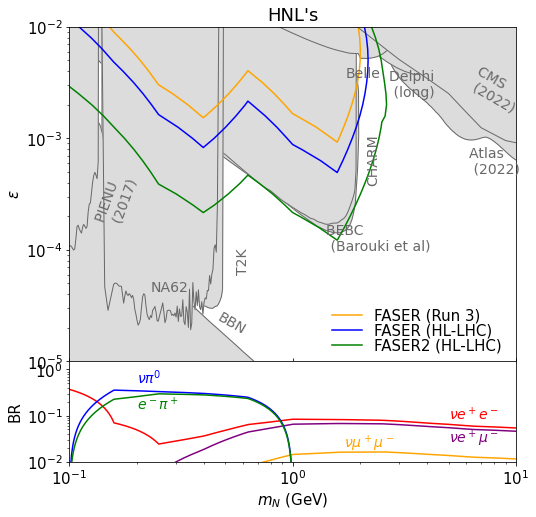

In [25]:
plot,ax, ax2 = foresee.plot_reach(
    setups=setups,
    bounds=bounds,
    projections=[],
    branchings = branchings,
    title="HNL's",
    xlims = [0.1, 10], 
    ylims = [1e-5, 1e-2],
    xlabel=r"$m_{N}$ (GeV)", 
    ylabel=r"$\epsilon$",
    legendloc=(1,0.2),
    figsize=(8,8),
)

plot.savefig("Reach_"+modelname+".pdf")
plot.show()

In [26]:
foresee.extract_contours(
    inputfile=f"model/results/{setups[0][0]}", 
    outputfile=f"model/lines/{setups[0][0]}.txt"
)

foresee.extract_contours(
    inputfile=f"model/results/{setups[1][0]}", 
    outputfile=f"model/lines/{setups[1][0]}.txt"
)

foresee.extract_contours(
    inputfile=f"model/results/{setups[2][0]}", 
    outputfile=f"model/lines/{setups[2][0]}.txt"
)